In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("Veri Analiz Çalışması - Sürücü Sürat ve Takip Mesafesi.csv")

In [5]:
df.head()

,Sürücü No,Ortalama Sürüş Hızı (km/s),Ortalama Takip Mesafesi (m)
0,1,79.0,54.0
1,2,83.1,66.0
2,3,43.4,33.0
3,4,44.2,89.0
4,5,56.2,59.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sürücü No                    100 non-null    int64  
 1   Ortalama Sürüş Hızı (km/s)   100 non-null    float64
 2   Ortalama Takip Mesafesi (m)  100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.columns

Index(['Sürücü No', 'Ortalama Sürüş Hızı (km/s)',
       'Ortalama Takip Mesafesi (m)'],
      dtype='object')

In [8]:
df.rename(columns={'Sürücü No':'id',
                  'Ortalama Sürüş Hızı (km/s)':'ortalama_hız',
                  'Ortalama Takip Mesafesi (m)':'ortalama_takip'},inplace=True)

In [9]:
df.head()

,id,ortalama_hız,ortalama_takip
0,1,79.0,54.0
1,2,83.1,66.0
2,3,43.4,33.0
3,4,44.2,89.0
4,5,56.2,59.8


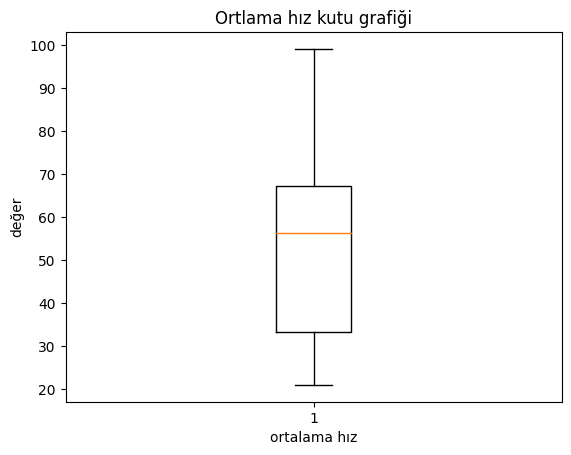

In [10]:
plt.boxplot(df.ortalama_hız)
plt.title("Ortlama hız kutu grafiği")
plt.xlabel("ortalama hız")
plt.ylabel("değer")
plt.show()

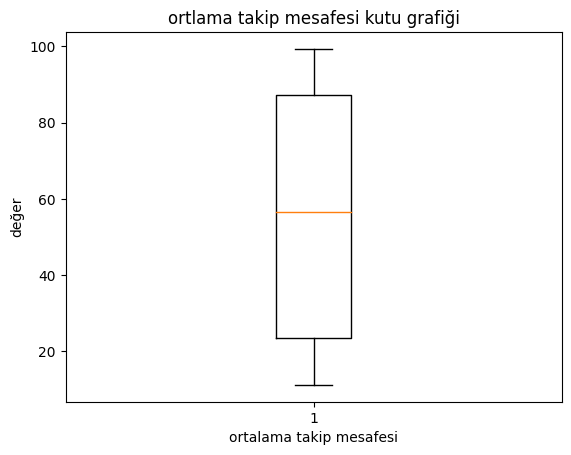

In [11]:
plt.boxplot(df.ortalama_takip)
plt.title("ortlama takip mesafesi kutu grafiği")
plt.xlabel("ortalama takip mesafesi")
plt.ylabel("değer")
plt.show()

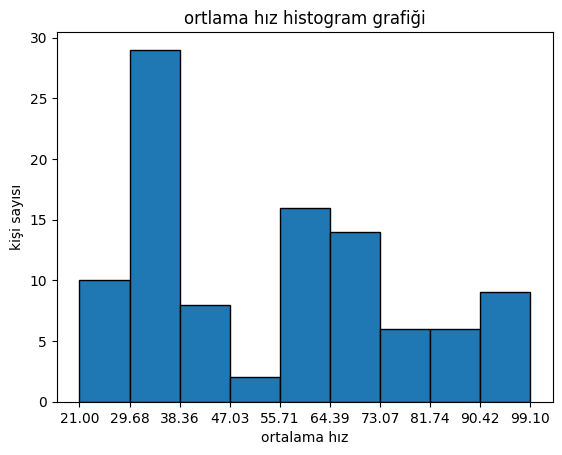

In [16]:
import numpy as np

counts, bins, patches = plt.hist(df.ortalama_hız, edgecolor="black", bins=9)

# X ekseni için manuel ayarlama
plt.xticks(np.round(bins, 2))  # X ekseninde değerleri yuvarlayarak göster

plt.title("ortlama hız histogram grafiği")
plt.xlabel("ortalama hız")
plt.ylabel("kişi sayısı")

plt.show()

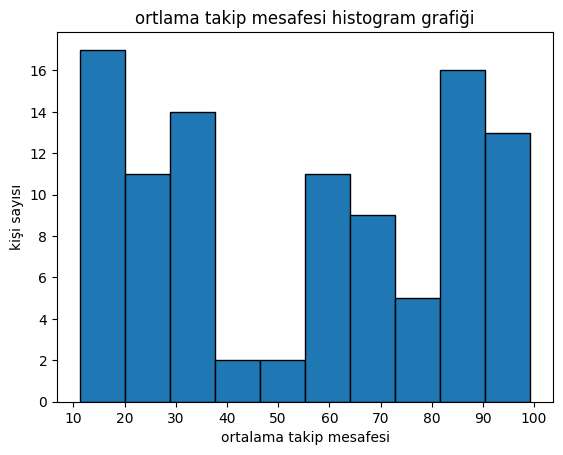

In [18]:
plt.hist(df.ortalama_takip,edgecolor="black",bins=10)

plt.xticks(np.arange(10,101,10))

plt.xlabel("ortalama takip mesafesi")
plt.ylabel("kişi sayısı")
plt.title("ortlama takip mesafesi histogram grafiği")

plt.show()

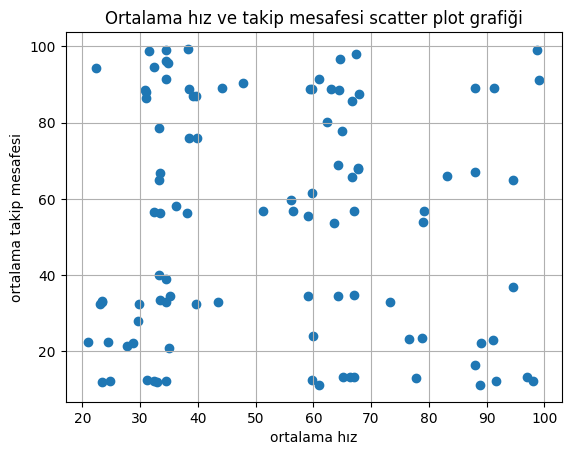

In [111]:
plt.scatter(df.ortalama_hız,df.ortalama_takip)

plt.xlabel("ortalama hız")
plt.ylabel("ortalama takip mesafesi")
plt.title("Ortalama hız ve takip mesafesi scatter plot grafiği")
plt.grid()
plt.show()

In [83]:
min_ort_hız = df.min().ortalama_hız
min_ort_hız

21.0

In [85]:
max_ort_hız = df.max().ortalama_hız
max_ort_hız

99.1

In [36]:
normal_veri =pd.DataFrame()

In [102]:
normal_veri["id"] = df["id"]

In [103]:
normal_veri.head()

,id
0,1
1,2
2,3
3,4
4,5


In [43]:
normal_veri.head()

,normalize_ortalama_hız


In [106]:
for i in range (len(df)):
    a=df.ortalama_hız.iloc[i]
    normal_veri.loc[i,'normalize_ortalama_hız']=(a-min_ort_hız)/(max_ort_hız-min_ort_hız)

In [107]:
normal_veri.head(100)

,id,normalize_ortalama_hız
0,1,0.742638
1,2,0.795134
2,3,0.286812
3,4,0.297055
4,5,0.450704
...,...,...
95,96,0.172855
96,97,0.179257
97,98,0.240717
98,99,0.128041


In [109]:
normal_veri["normalize_takip_mesafesi"] = (df['ortalama_takip']-df['ortalama_takip'].min())/(df['ortalama_takip'].max()-df['ortalama_takip'].min())

In [110]:
normal_veri.head()

,id,normalize_ortalama_hız,normalize_takip_mesafesi
0,1,0.742638,0.485812
1,2,0.795134,0.622020
2,3,0.286812,0.247446
3,4,0.297055,0.883087
4,5,0.450704,0.551646


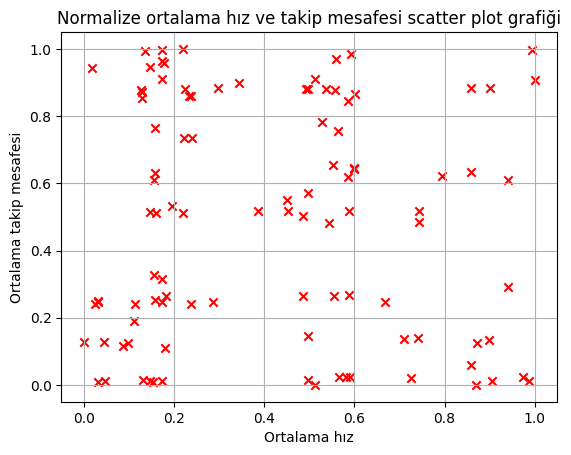

In [120]:
plt.scatter(normal_veri.normalize_ortalama_hız,normal_veri.normalize_takip_mesafesi,marker='x',color="red")

plt.xlabel("Ortalama hız")
plt.ylabel("Ortalama takip mesafesi")
plt.title("Normalize ortalama hız ve takip mesafesi scatter plot grafiği")

plt.grid()
plt.show()

In [121]:
standartization_veri = pd.DataFrame()

In [122]:
standartization_veri["id"] = df["id"]